# Module 3 Assignment

# sklearn.datasets.load_diabetes

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dataset = pd.DataFrame(data = np.c_[diabetes['data'], diabetes['target']],
                       columns = diabetes['feature_names'] + ['target'])
dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


The dataset used is the diabetes dataset from the sklearn library called load_diabetes().

# Correlation

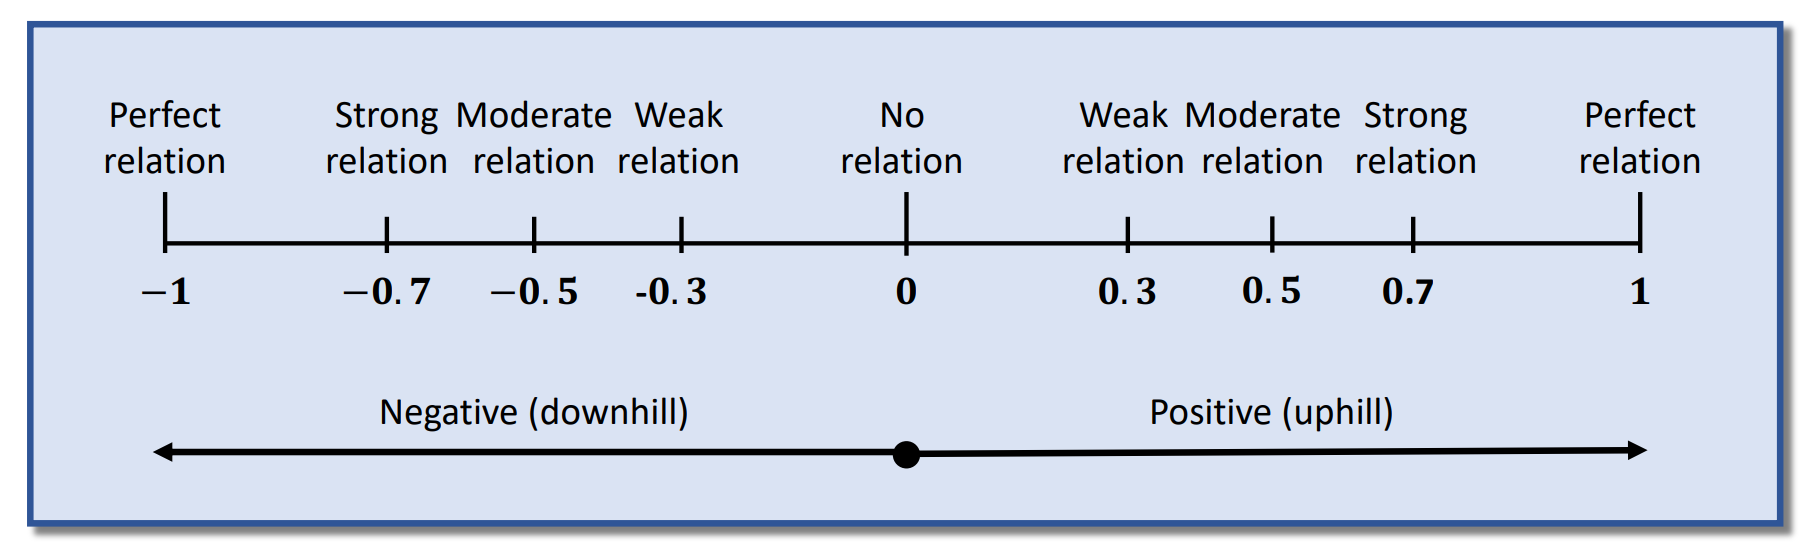

<AxesSubplot:>

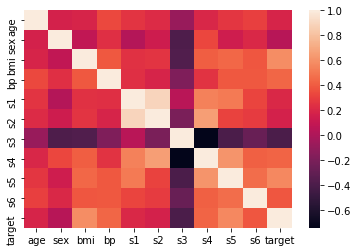

In [2]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [3]:
dataset.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Correlation between each columns can be calculated using corr() function. These correlations can be displayed using seaborn with sns.heatmap().

# What are the factors that contribute to the disease progression of a diabetes patient?

## Question 1

"What is the distribution of the target value looks like?"

In [4]:
dataset["target"].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

<AxesSubplot:>

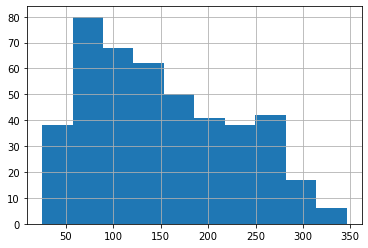

In [5]:
dataset["target"].hist()

Conclusion - The target is ranged from 25 to 346. The distribution is right skewed which indicates more targets are below the overall average (152.13).

## Question 2

"The younger the patient, the lower the target value."

In [6]:
dataset[["age", "target"]].corr()

,age,target
age,1.000000,0.187889
target,0.187889,1.000000


<AxesSubplot:xlabel='age', ylabel='target'>

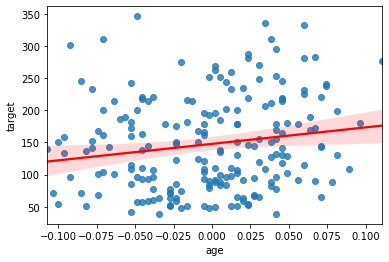

In [7]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="age", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.19 indicates that age has positive weak relation with the target value. Therefore, the assumption of "the younger the patient, the lower the target value" is weakly true.

## Question 3

"Male has higher target value than female."

In [8]:
dataset[["sex", "target"]].corr()

,sex,target
sex,1.000000,0.043062
target,0.043062,1.000000


<AxesSubplot:xlabel='sex', ylabel='target'>

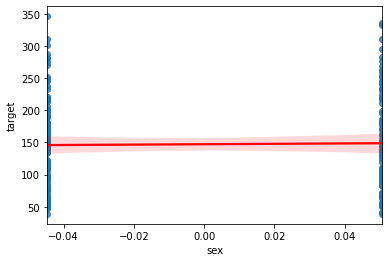

In [9]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="sex", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.04 indicates that there is no linear relationship. Based on the visualization of sample data, we also do not see the scatterplot has a negative linear trend.

## Question 4

"The higher the body mass index (BMI), the higher the target value."

In [10]:
dataset[["bmi", "target"]].corr()

,bmi,target
bmi,1.00000,0.58645
target,0.58645,1.00000


<AxesSubplot:xlabel='bmi', ylabel='target'>

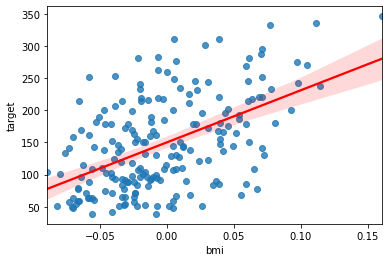

In [11]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="bmi", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.59 indicates that BMI has positive moderate relation with the target value. Therefore, the assumption of "the higher the body mass index (BMI), the higher the target value" is moderately true.

## Question 5

"The lower the blood pressure (BP), the lower the target value."

In [12]:
dataset[["bp", "target"]].corr()

,bp,target
bp,1.000000,0.441484
target,0.441484,1.000000


<AxesSubplot:xlabel='bp', ylabel='target'>

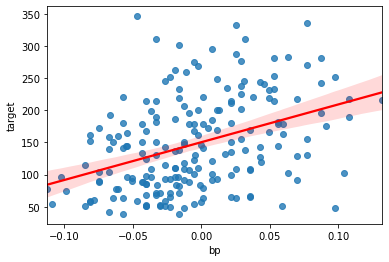

In [13]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="bp", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.44 indicates that BP has positive moderate relation with the target value. Therefore, the assumption of "the lower the blood pressure (BP), the lower the target value" is moderately true.

## Question 6

"The higher the first blood serum measurement (S1), the higher the target value."

In [14]:
dataset[["s1", "target"]].corr()

,s1,target
s1,1.000000,0.212022
target,0.212022,1.000000


<AxesSubplot:xlabel='s1', ylabel='target'>

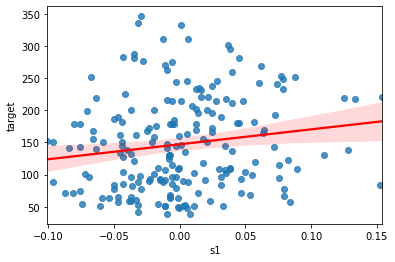

In [15]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="s1", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.21 indicates that S1 has positive weak relation with the target value. Therefore, the assumption of "the higher the first blood serum measurement (S1), the higher the target value" is weakly true.

## Question 7

"The lower the second blood serum measurement (S2), the lower the target value."

In [16]:
dataset[["s2", "target"]].corr()

,s2,target
s2,1.000000,0.174054
target,0.174054,1.000000


<AxesSubplot:xlabel='s2', ylabel='target'>

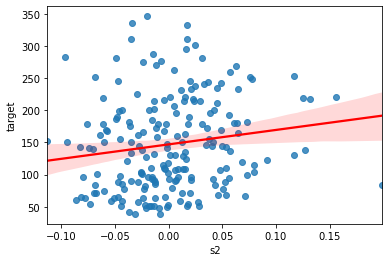

In [17]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="s2", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.17 indicates that S2 has positive weak relation with the target value. Therefore, the assumption of "the lower the second blood serum measurement (S2), the lower the target value" is weakly true.

## Question 8

"The higher the third blood serum measurement (S3), the lower the target value."

In [18]:
dataset[["s3", "target"]].corr()

,s3,target
s3,1.000000,-0.394789
target,-0.394789,1.000000


<AxesSubplot:xlabel='s3', ylabel='target'>

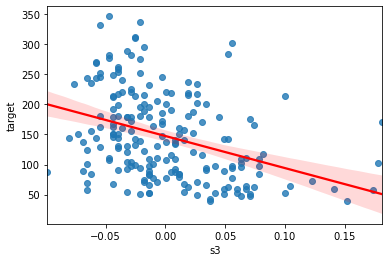

In [19]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="s3", y="target", line_kws={"color": "red"})

Conclusion - The correlation value -0.39 indicates that S3 has negative weak relation with the target value. Therefore, the assumption of "the higher the third blood serum measurement (S3), the lower the target value" is weakly true.

## Question 9

"The lower the fourth blood serum measurement (S4), the lower the target value."

In [20]:
dataset[["s4", "target"]].corr()

,s4,target
s4,1.000000,0.430453
target,0.430453,1.000000


<AxesSubplot:xlabel='s4', ylabel='target'>

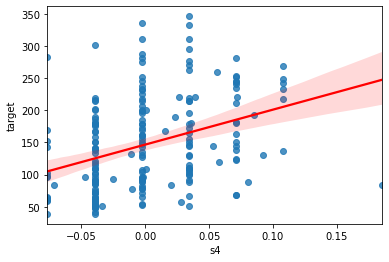

In [21]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="s4", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.43 indicates that S4 has positive moderate relation with the target value. Therefore, the assumption of "the lower the fourth blood serum measurement (S4), the lower the target value" is moderately true.

## Question 10

"The higher the fifth blood serum measurement (S5), the higher the target value."

In [22]:
dataset[["s5", "target"]].corr()

,s5,target
s5,1.000000,0.565883
target,0.565883,1.000000


<AxesSubplot:xlabel='s5', ylabel='target'>

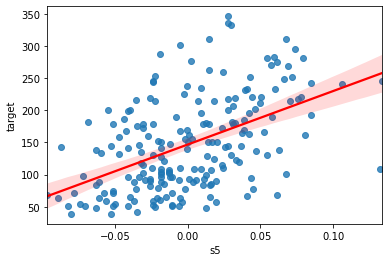

In [23]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="s5", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.57 indicates that S5 has positive moderate relation with the target value. Therefore, the assumption of "the higher the fifth blood serum measurement (S5), the higher the target value" is moderately true.

## Question 11

"The lower the sixth blood serum measurement (S6), the lower the target value."

In [24]:
dataset[["s6", "target"]].corr()

,s6,target
s6,1.000000,0.382483
target,0.382483,1.000000


<AxesSubplot:xlabel='s6', ylabel='target'>

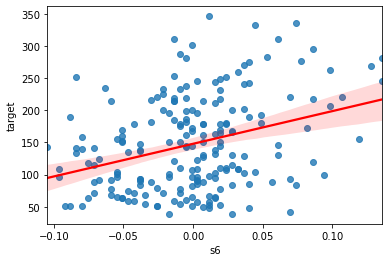

In [25]:
sns.regplot(data=dataset.sample(200, random_state=1),
            x="s6", y="target", line_kws={"color": "red"})

Conclusion - The correlation value 0.38 indicates that S6 has positive weak relation with the target value. Therefore, the assumption of "the lower the sixth blood serum measurement (S6), the lower the target value" is weakly true.

## Conclusion

- The factors that moderately contribute to the target value are Body Mass Index (BMI), Body Pressure (BP), Fourth and Fifth Blood Serum Measurement (S4 & S5).
- Meanwhile, the factors that weakly contribute to the target value are Age and First, Second, Third, and Sixth Blood Serum Measurement (S1, S2, S3, S6).
- Lastly, factor Sex has no relation to the target value.